# Importing Modules

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [31]:
data=pd.read_csv("insurance3r2.csv")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [33]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
               age          sex          bmi         steps     children  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397   5328.623318     1.094918   
std      14.049960     0.500160     6.098187   2453.643236     1.205493   
min      18.000000     0.000000    15.960000   3000.000000     0.000000   
25%      27.000000     0.000000    26.296250   3008.000000     0.000000   
50%      39.000000     1.000000    30.400000   4007.000000     1.000000   
75%      51.000000     1.000000    34.693750   8004.000000     2.000000   
max      64.000000     1.000000    53.130000  10010.000000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1338.000000  1338.000000   1338.000000     1338.000000  
mean      0.204783     1.515695  13270.422265        0.585202  
std       0.403694     1.104885  12110.011237        0.492871  
min       0.000000     0.000000   1121.873900  

In [34]:
data=data.dropna()

In [35]:
data=pd.get_dummies(data)
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


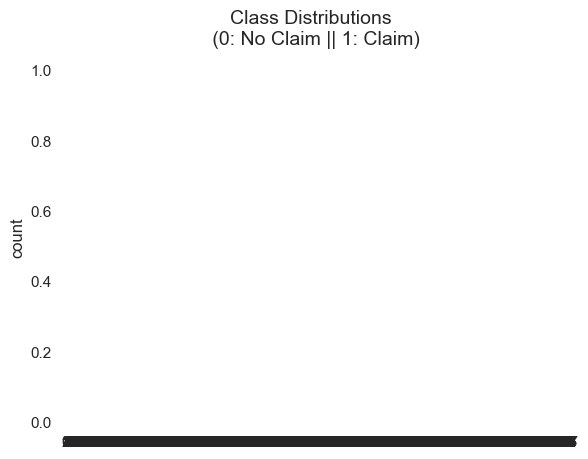

In [36]:
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)
sns.set(style="darkgrid")
sns.countplot(data['insuranceclaim'])
plt.grid()
plt.show()


In [37]:
corr=data.corr()

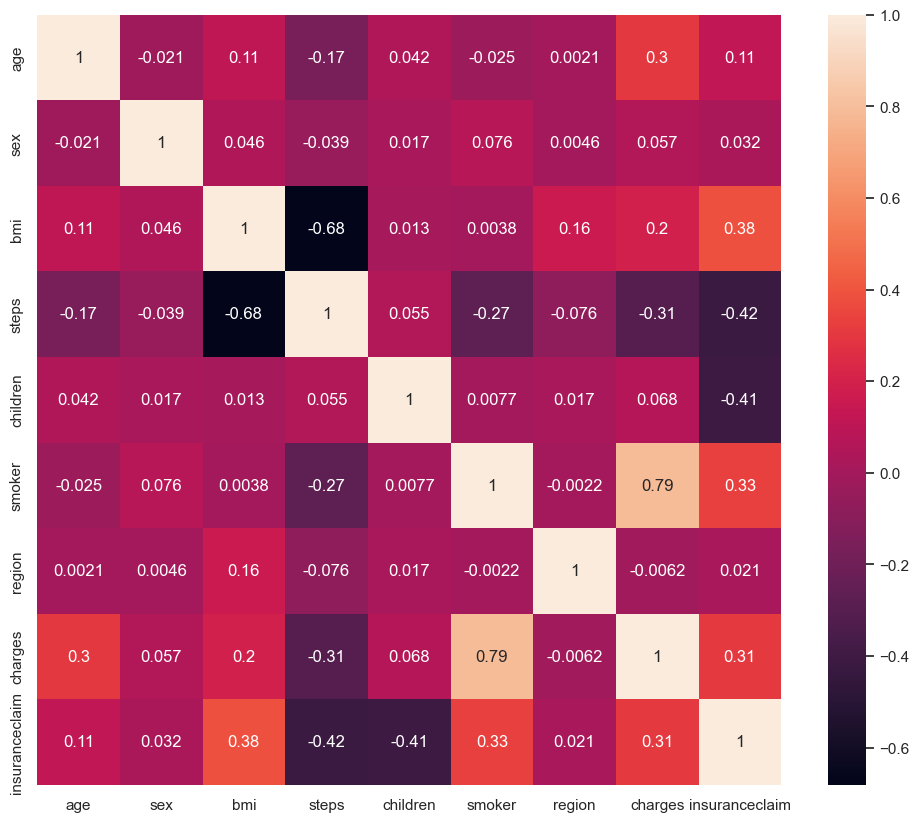

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

In [39]:
data = data.drop(columns=['region'], errors='ignore')


Text(0.5, 1.0, 'Age vs Charges')

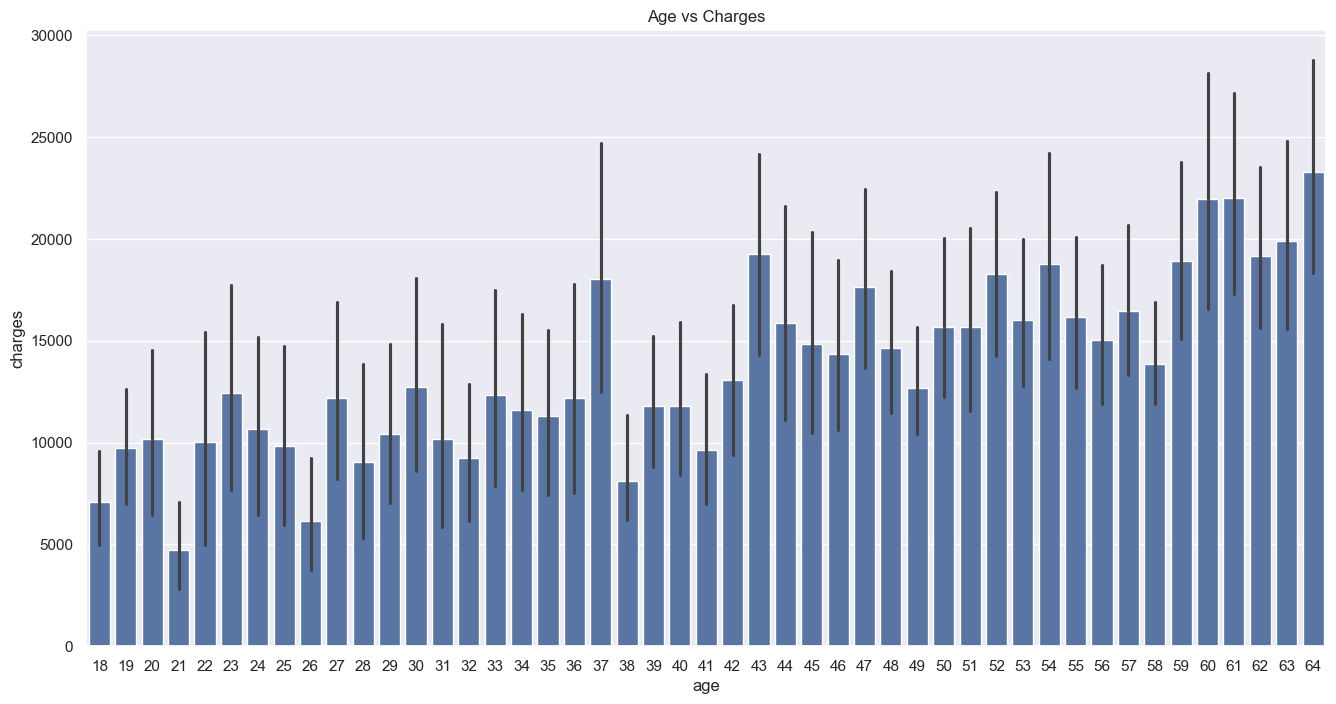

In [40]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

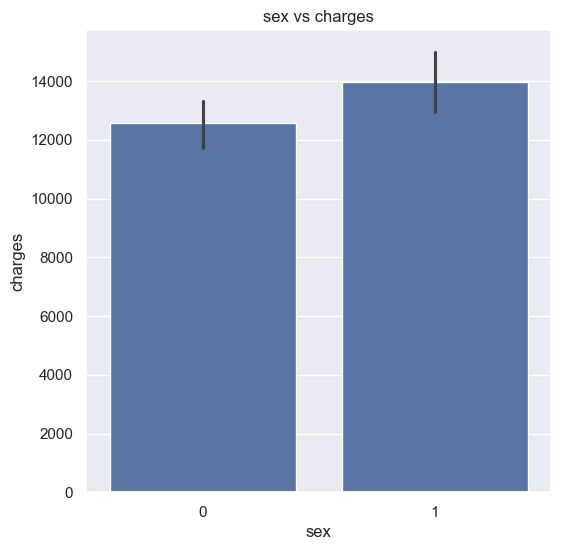

In [41]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)
plt.title('sex vs charges')

In [42]:
X=data.iloc[:,:-1]
X.head()

,age,sex,bmi,steps,children,smoker,charges
0,19,0,27.900,3009,0,1,16884.92400
1,18,1,33.770,3008,1,0,1725.55230
2,28,1,33.000,3009,3,0,4449.46200
3,33,1,22.705,10009,0,0,21984.47061
4,32,1,28.880,8010,0,0,3866.85520


In [43]:
X.shape

(1338, 7)

In [44]:
Y=data.iloc[:,-1]
Y.head()

Y.shape

(1338,)

In [45]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
data.to_csv('finaldata.csv')
X_test.to_csv('testing.csv')

In [46]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_train=ss.fit_transform(X_train)

X_train

X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_train

X_test=ss.fit_transform(X_test)

X_test=pd.DataFrame(X_test,columns=X_train.columns)

X_test

y_train

332     1
355     1
138     0
381     1
292     1
       ..
1095    0
1130    0
1294    0
860     1
1126    1
Name: insuranceclaim, Length: 936, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
ypred=rf.predict(X_test)
print(confusion_matrix(y_test,ypred))

[[156   5]
 [ 14 227]]


In [48]:
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)


    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)


    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [49]:
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Accuracy of the Model KNeighborsClassifier 92.8%


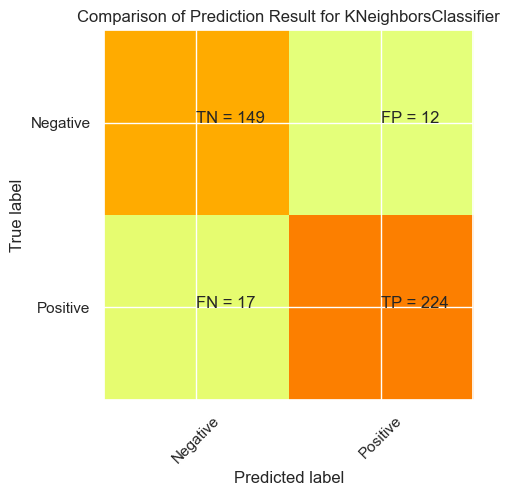

In [50]:
from sklearn.neighbors import KNeighborsClassifier
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model DecisionTreeClassifier 94.8%


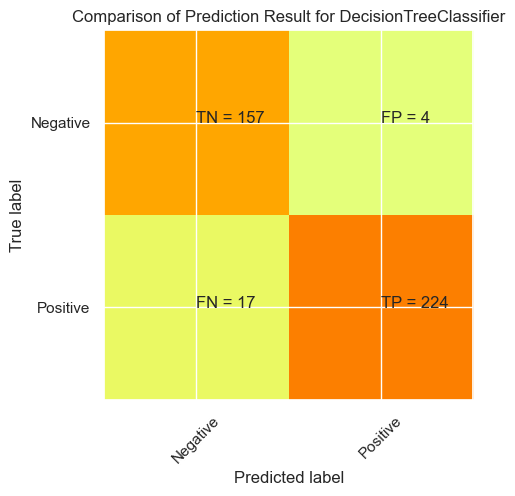

In [51]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model RandomForestClassifier 95.5%


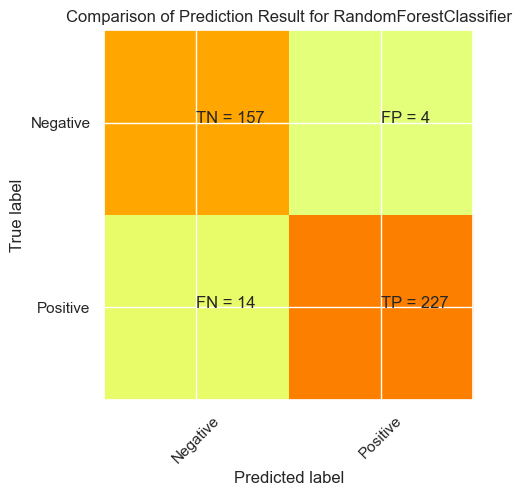

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model LogisticRegression 88.1%


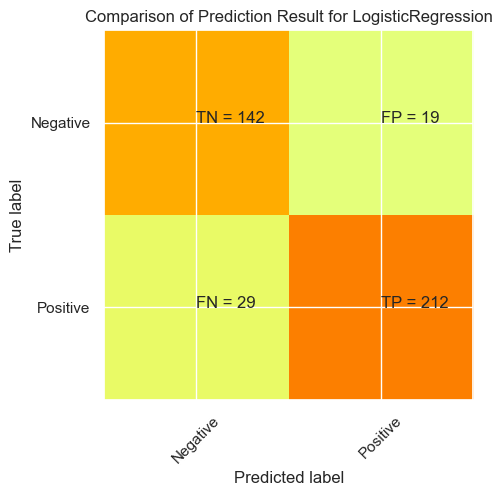

In [53]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

In [54]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


def predict_insurance():
    print("\nEnter the following details:")

    # Collect inputs for all features dynamically
    user_input = []
    for feature in X.columns:
        value = input(f"Enter {feature}: ").strip().lower()

        # Convert categorical features
        if value in ["male", "yes"]:   # Convert to 1
            value = 1
        elif value in ["female", "no"]: # Convert to 0
            value = 0
        else:
            value = float(value)  # Convert numerical values to float

        user_input.append(value)

    # Convert to numpy array and scale it
    user_input = np.array(user_input).reshape(1, -1)
    user_input = scaler.transform(user_input)


    result = rf.predict(user_input)


    prediction = "Yes, person can claim insurance" if int(result) == 1 else "No, person will not claim insurance"
    print("\nPrediction:", prediction)


predict_insurance()



Enter the following details:

Prediction: Yes, person can claim insurance


C:\Users\m sai krishna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\m sai krishna\AppData\Local\Temp\ipykernel_2776\3222227047.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = "Yes, person can claim insurance" if int(result) == 1 else "No, person will not claim insurance"
